### Variate Autoregression Model

In [7]:

import pandas as pd
from statsmodels.tsa.api import VAR
import os
from dotenv import load_dotenv
import yfinance as yf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
# Load environment variables from the .env file
load_dotenv('../.env');

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
from calendar import monthrange, month_name
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler


import numpy as np

In [8]:
# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_symbols = tickers['Symbol'].tolist()

# And the company name
sp500_names = tickers['Security'].tolist()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty list to store DataFrames for each stock
company_list = []

# Download data for each stock and add a 'company_name' column
for stock, com_name in zip(sp500_symbols, sp500_names):
    df = yf.download(stock, start, end)
    df['company_name'] = com_name
    company_list.append(df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(company_list, axis=0)

df.tail(100)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-18 00:00:00 -> 2023-12-18 22:16:13.458711)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

C:\Users\chris\AppData\Local\Temp\ipykernel_15592\3368134996.py:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(company_list, axis=0)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-28,190.500000,191.279999,187.860001,189.899994,189.446411,1899800.0,Zoetis
2023-07-31,189.179993,190.089996,186.440002,188.089996,187.640732,1500800.0,Zoetis
2023-08-01,187.460007,188.770004,184.789993,185.509995,185.066895,1535300.0,Zoetis
2023-08-02,184.229996,185.869995,181.660004,182.000000,181.565292,2284800.0,Zoetis
2023-08-03,180.610001,183.259995,179.759995,180.880005,180.447968,1688000.0,Zoetis
...,...,...,...,...,...,...,...
2023-12-12,190.080002,192.500000,188.919998,191.470001,191.470001,1899700.0,Zoetis
2023-12-13,191.779999,197.669998,190.940002,197.410004,197.410004,2104700.0,Zoetis
2023-12-14,198.000000,201.919998,198.000000,200.089996,200.089996,3044400.0,Zoetis


In [9]:
import pandas as pd
df = df.assign(
    timestamp=pd.to_datetime(df.index), 
    date=df.index.date,
    year=df.index.year,
    month=df.index.month,
    day=df.index.day,
    dayofyear=df.index.dayofyear,
)

print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-19  121.330002  123.769997  121.160004  122.129997  115.167542   
2022-12-20  121.989998  122.330002  120.699997  120.809998  113.922783   
2022-12-21  121.830002  123.839996  121.510002  123.459999  116.421722   
2022-12-22  122.220001  122.500000  119.199997  121.589996  114.658325   
2022-12-23  120.790001  121.000000  117.800003  120.139999  113.290985   
...                ...         ...         ...         ...         ...   
2023-12-12  190.080002  192.500000  188.919998  191.470001  191.470001   
2023-12-13  191.779999  197.669998  190.940002  197.410004  197.410004   
2023-12-14  198.000000  201.919998  198.000000  200.089996  200.089996   
2023-12-15  199.410004  199.410004  193.970001  196.289993  196.289993   
2023-12-18  197.809998  198.050003  195.615005  196.720001  196.720001   

               Volume company_name  t

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,timestamp,year,month,day,dayofyear
count,125460.000000,125460.000000,125460.000000,125460.000000,125460.000000,1.254600e+05,125460,125460.000000,125460.000000,125460.000000,125460.000000
mean,178.308400,180.262368,176.452789,178.423586,177.207697,4.824568e+06,2023-06-20 03:40:45.796269824,2022.964204,6.561844,15.859868,184.218946
min,7.710000,7.900000,7.530000,7.670000,7.670000,0.000000e+00,2022-12-19 00:00:00,2022.000000,1.000000,1.000000,3.000000
25%,59.009998,59.650002,58.349998,58.980000,58.192864,9.683000e+05,2023-03-21 00:00:00,2023.000000,4.000000,8.000000,93.000000
50%,106.510002,107.680000,105.360001,106.559998,105.401535,1.968300e+06,2023-06-21 00:00:00,2023.000000,7.000000,16.000000,186.000000
75%,202.029999,204.240005,199.889999,202.139999,200.897980,4.367100e+06,2023-09-20 00:00:00,2023.000000,10.000000,23.000000,276.000000
max,6896.669922,6997.069824,6853.189941,6934.399902,6934.399902,3.723413e+08,2023-12-18 00:00:00,2023.000000,12.000000,31.000000,364.000000
std,341.105679,344.866726,337.841959,341.439260,341.256779,1.093660e+07,NaN,0.185783,3.431448,8.766843,104.835067


In [32]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,timestamp,date,year,month,day,dayofyear
Date,,,,,,,,,,,,,
2022-12-19,121.330002,123.769997,121.160004,122.129997,115.167542,2440100.0,3M,2022-12-19,2022-12-19,2022,12,19,353
2022-12-20,121.989998,122.330002,120.699997,120.809998,113.922783,2903000.0,3M,2022-12-20,2022-12-20,2022,12,20,354
2022-12-21,121.830002,123.839996,121.510002,123.459999,116.421722,2578100.0,3M,2022-12-21,2022-12-21,2022,12,21,355
2022-12-22,122.220001,122.500000,119.199997,121.589996,114.658325,2188400.0,3M,2022-12-22,2022-12-22,2022,12,22,356
2022-12-23,120.790001,121.000000,117.800003,120.139999,113.290985,2609300.0,3M,2022-12-23,2022-12-23,2022,12,23,357


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125460 entries, 2022-12-19 to 2023-12-18
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Open          125460 non-null  float64       
 1   High          125460 non-null  float64       
 2   Low           125460 non-null  float64       
 3   Close         125460 non-null  float64       
 4   Adj Close     125460 non-null  float64       
 5   Volume        125460 non-null  float64       
 6   company_name  125460 non-null  object        
 7   timestamp     125460 non-null  datetime64[ns]
 8   date          125460 non-null  object        
 9   year          125460 non-null  int32         
 10  month         125460 non-null  int32         
 11  day           125460 non-null  int32         
 12  dayofyear     125460 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(4), object(2)
memory usage: 11.5+ MB


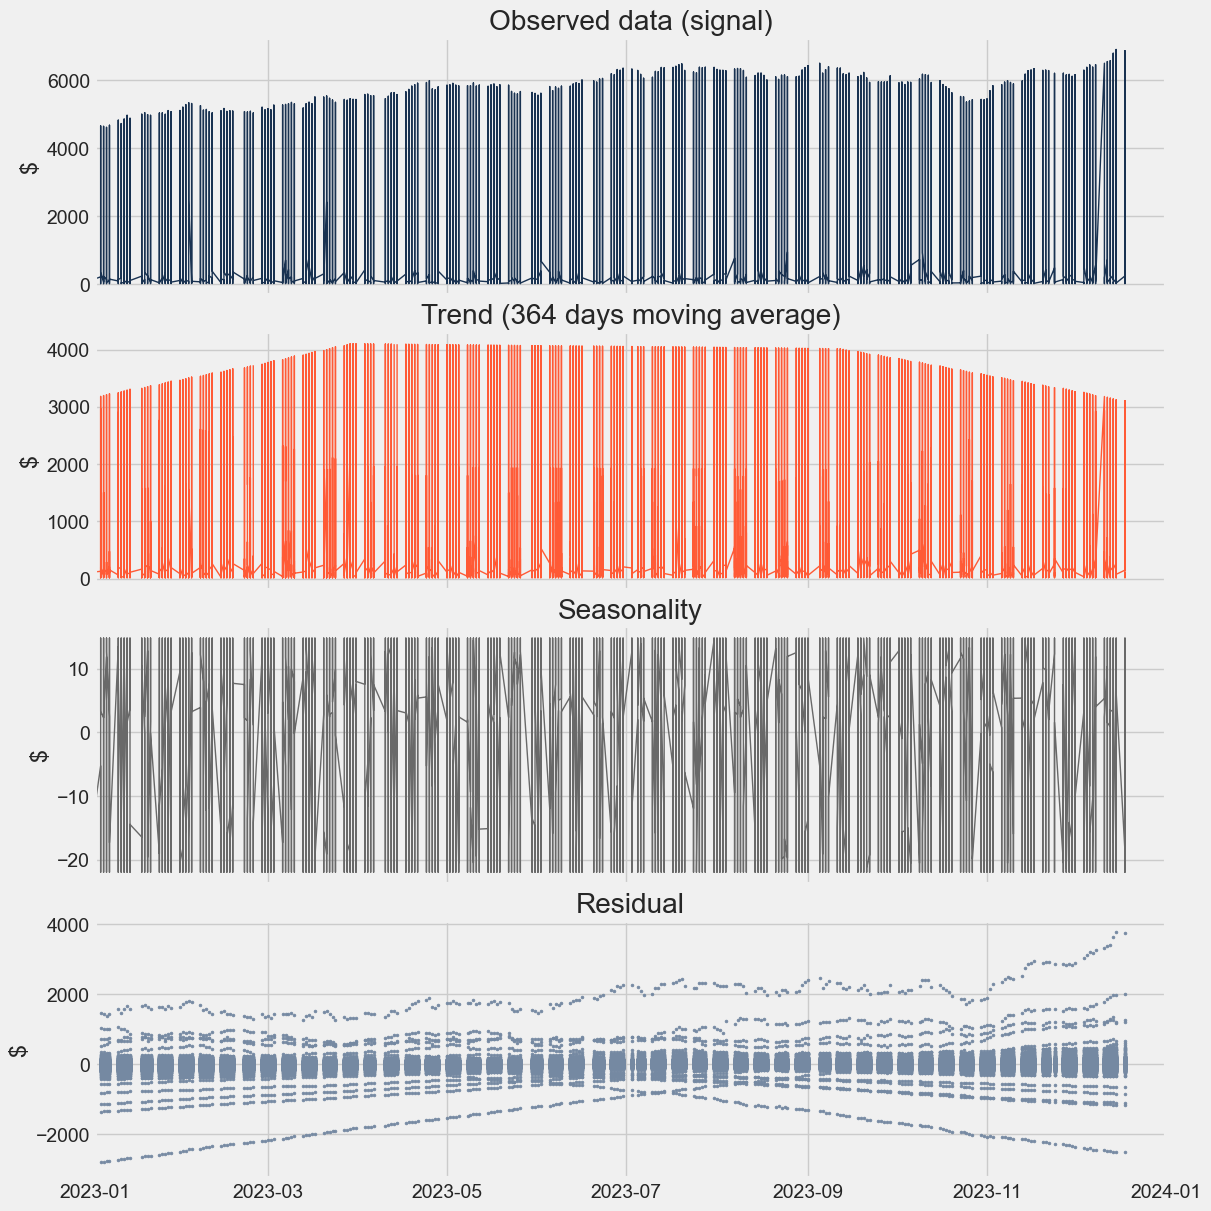

In [36]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df['Open'], 
    model='additive', 
    two_sided=True,
    period= 365)

# Plots:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

#Plot Signal
ax[0].set(title='Observed data (signal)', 
          ylabel="$")
seas_decomp_yearly.observed.plot(color=sns_c[0], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[0])
#Plot Trend
ax[1].set(title='Trend (364 days moving average)', 
          ylabel="$")
seas_decomp_yearly.trend.plot(color=sns_c[1], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[1])
#Plot Seasonality
ax[2].set(title='Seasonality', 
          ylabel="$")
seas_decomp_yearly.seasonal.plot(
                                color=sns_c[2], 
                                linewidth=1,
                                sharex=True,
                                ax=ax[2])
#Plot residual
ax[3].set(title='Residual', 
          ylabel="$");
ax[3].scatter(
    x=seas_decomp_yearly.resid.index,
    y=seas_decomp_yearly.resid,
    color=sns_c[3],
    s=4)

for i in range(4):
    ax[i].set_xlim(pd.to_datetime("2023"),pd.to_datetime("2024"))
    
fig.savefig("../VRA.III.png",dpi=300)

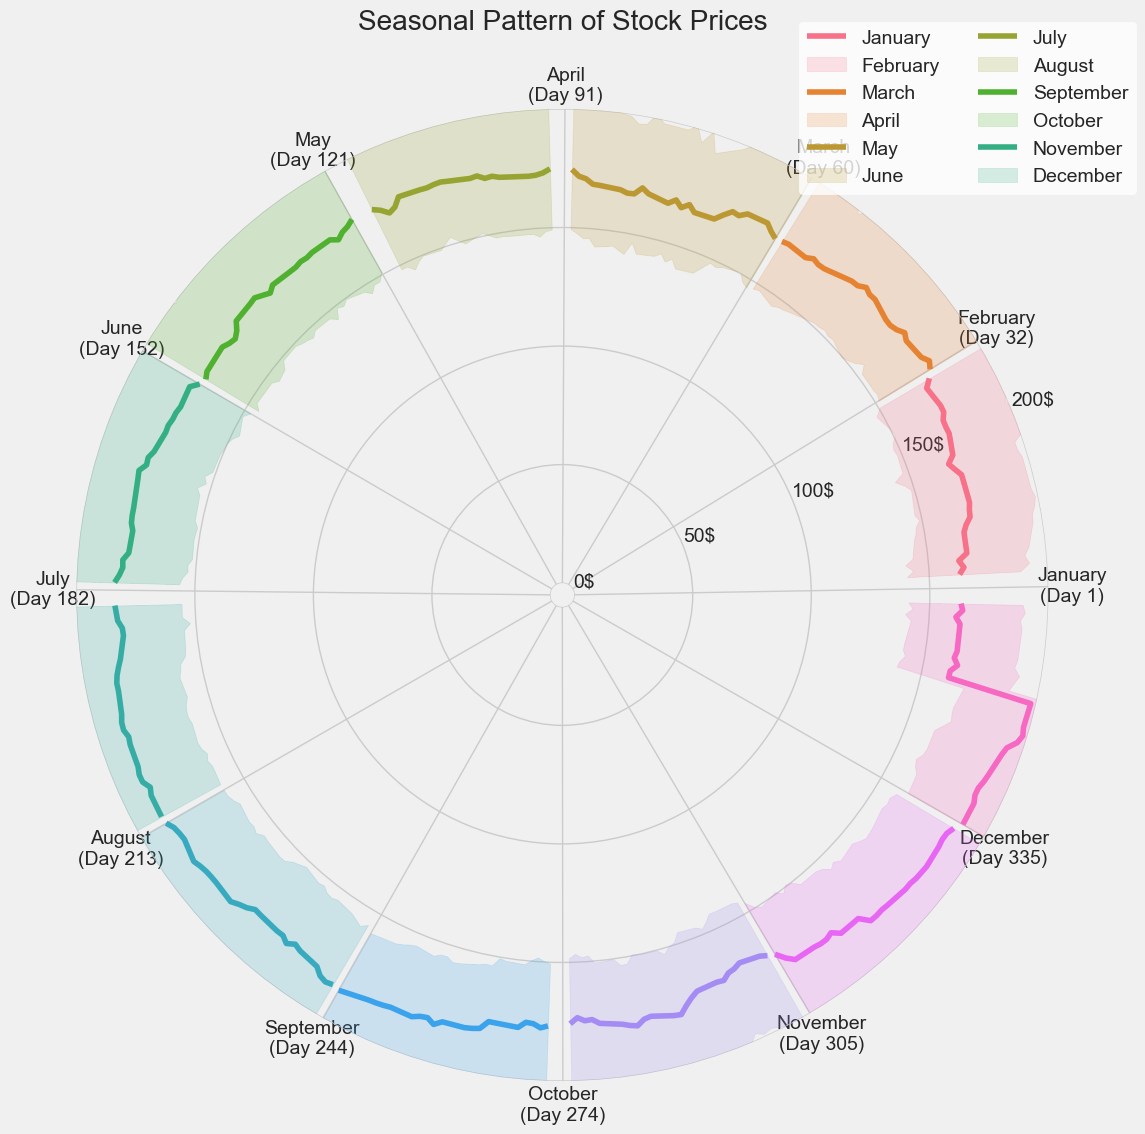

AttributeError: 'PolarAxes' object has no attribute 'savefig'

In [37]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df \
    .assign(day_of_year_cyclic=lambda x: 2 * np.pi * x.index.dayofyear / 365.25) \
    .pipe((sns.lineplot, 'data'), 
          x='day_of_year_cyclic', 
          y='Adj Close', 
          hue='month',
          palette=sns.color_palette("husl", 12),
          ax=ax)
          
# Make the plot more beautiful
month_label=[month_name[i] for i in range(1,13)]
month_label_long=[label+'\n(Day ' +str(month_start[ind]) +')' for ind,label in enumerate(month_label)]

days_per_month = [0] + [monthrange(2021, i)[1] for i in range(1, 13)]
month_start = np.cumsum(days_per_month) + 1
month_start_theta = [i * 2 * np.pi / 365.25 for i in month_start]

# Use the same number of tick locations and labels
ax.set_title('Seasonal Pattern of Stock Prices', va='bottom', pad=22)
ax.spines.clear()

ax.set_xlabel('')
ax.set_xticks(month_start_theta[:-1])  # Use all locations except the last one
ax.set_xticklabels(month_label_long)

ax.set_ylabel('')
ax.set_ylim(0, 200)
ax.set_yticks(yt := [0,50, 100, 150, 200])
ax.set_yticklabels([str(t) + '$' for t in yt], rotation=45)



# Arrows / Annotations
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="dimgrey")

# Update arrow positions based on your data range
arrow_pos1 = (1 * np.pi / 180, 1000)
arrow_pos2 = (25 * np.pi / 180, 1000)

a1 = patches.FancyArrowPatch(arrow_pos1, (1 * np.pi / 180, 2000), **kw)
a2 = patches.FancyArrowPatch(arrow_pos2, (25 * np.pi / 180, 2000), connectionstyle=f"arc3,rad={0.105}", **kw)

ax.add_patch(a1)
ax.add_patch(a2)


ax.set_rorigin(-5)
ax.xaxis.set_tick_params(which='major', pad=10)

ax.legend(labels=month_label, ncol=2, facecolor='white', edgecolor='white', bbox_to_anchor=(1.1, 1.1), loc=1)

ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

plt.show()

ax.savefig("../var_II.1.png",dpi=300)


In [13]:

# Get the list of tickers for the S&P 500

# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_tickers = tickers['Symbol'].tolist()

In [14]:
# Download historical data for each stock
stock_data = yf.download(sp500_tickers, start='2005-01-01', end='2023-01-01', progress=False)

# Extract the closing prices and create a new DataFrame
closing_prices = stock_data['Adj Close']

# Create a MultiIndex with dates and tickers
closing_prices.columns = pd.MultiIndex.from_product([closing_prices.columns, ['Close']])

# Display the resulting DataFrame
closing_prices.head()


4 Failed downloads:
['VLTO', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1104555600, endDate = 1672549200")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2023-01-01)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512985,NaN,0.958030,NaN,NaN,14.365734,4.233333,18.995508,30.838949,23.200199,...,35.891033,8.957226,26.668760,24.465841,NaN,11.864744,69.819275,55.509998,48.117664,NaN
2005-01-04 00:00:00,14.130104,NaN,0.967869,NaN,NaN,14.221066,4.177778,18.548897,30.024111,22.569033,...,35.814369,8.823020,26.487741,24.267960,NaN,11.707623,69.792885,54.470001,47.460766,NaN
2005-01-05 00:00:00,14.124031,NaN,0.976346,NaN,NaN,14.057921,4.153333,18.476862,29.859142,22.671036,...,36.219566,8.723603,26.349314,23.982141,NaN,11.679749,69.247551,52.570000,47.289406,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977102,NaN,NaN,14.374971,4.147778,18.311186,29.364239,22.632786,...,37.686943,8.708689,26.684729,24.096479,NaN,11.811525,70.047951,52.650002,47.560726,NaN
2005-01-07 00:00:00,13.801922,NaN,1.048247,NaN,NaN,14.621228,4.191111,19.168396,29.384233,22.664656,...,36.433079,8.658980,26.509054,23.911789,NaN,11.745641,69.924805,53.099998,46.404015,NaN


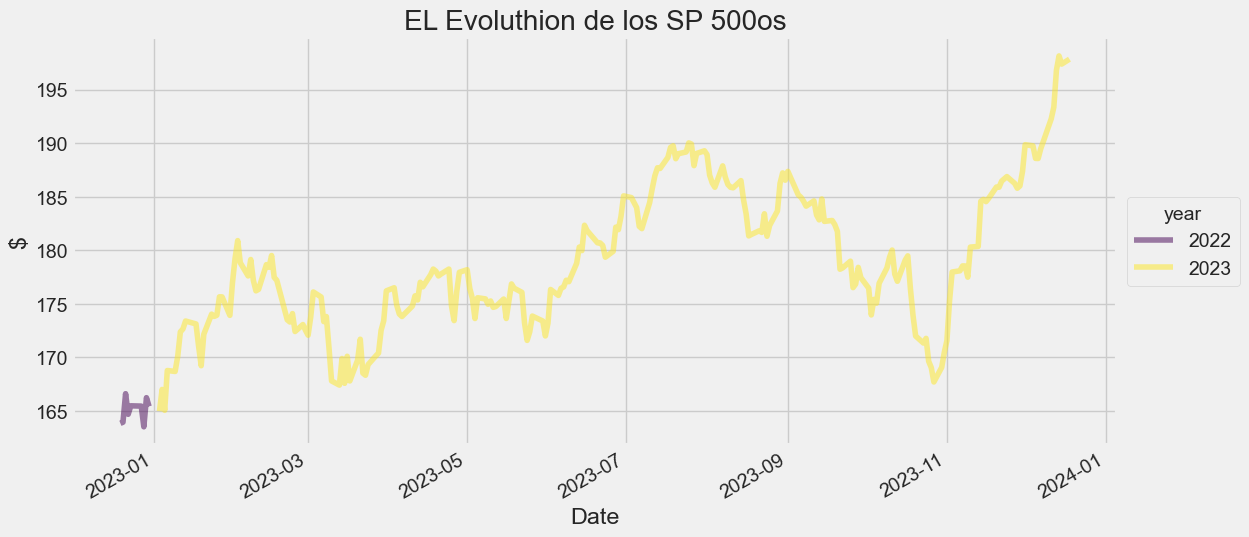

In [15]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df[['year', 'dayofyear', 'Close']], index='Date', columns='year') \
    ['Close'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='EL Evoluthion de los SP 500os', ylabel="$");

fig.savefig("../var_II.2.png",dpi=300)

In [16]:
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4531 entries, 2005-01-03 00:00:00 to 2022-12-30 00:00:00
Columns: 503 entries, ('A', 'Close') to ('ZTS', 'Close')
dtypes: float64(503)
memory usage: 17.4+ MB


In [17]:
closing_prices.describe()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
count,4531.000000,4346.000000,4531.000000,2518.000000,518.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,...,4531.000000,4531.000000,4531.000000,4531.000000,2823.000000,4531.000000,4531.000000,4531.000000,4531.000000,2497.000000
mean,48.448794,24.411172,36.424995,67.152163,146.422568,43.033643,20.419887,99.804115,143.939038,57.838992,...,86.942125,29.423454,52.142977,40.256212,56.365921,50.791100,85.736241,118.573308,33.597528,89.944939
std,38.021691,15.226563,45.361764,32.997960,31.584883,32.539582,13.123476,88.428410,162.333301,44.493792,...,40.807460,19.175404,13.558789,11.521050,29.439899,33.773974,31.740740,134.141466,15.812926,56.585396
min,8.024001,1.659225,0.958030,21.519718,82.489998,11.856324,4.078889,15.465816,15.980000,10.995414,...,9.439812,8.338988,25.885147,19.614285,19.548439,11.458580,28.260181,16.450001,5.134859,26.500347
25%,22.004001,10.372511,5.530656,41.928811,116.712500,18.159931,7.894444,29.679862,33.549999,23.640970,...,56.660452,12.651336,41.584856,30.905018,31.396739,19.521841,58.178322,36.720001,20.024181,42.772064
50%,33.903702,21.469999,18.400400,61.513857,150.510002,31.388956,18.343332,66.755608,59.080002,39.247868,...,84.909927,21.677040,53.144962,37.733372,48.811932,42.830475,82.544579,51.700001,30.951424,71.059265
75%,64.691982,37.807462,41.923763,82.178431,169.985004,57.459465,30.340000,146.033844,238.320000,81.730255,...,112.810692,41.318060,59.671356,50.018387,75.770725,75.110062,110.596352,151.745003,47.290485,139.289001
max,176.669449,59.345577,179.953888,163.539825,216.839996,136.396835,63.619999,403.419495,688.369995,181.135361,...,211.408646,74.477821,110.410362,66.997940,134.216324,133.725113,170.146332,614.549988,68.870651,243.014008


In [18]:
closing_prices.columns

MultiIndex([(   'A', 'Close'),
            ( 'AAL', 'Close'),
            ('AAPL', 'Close'),
            ('ABBV', 'Close'),
            ('ABNB', 'Close'),
            ( 'ABT', 'Close'),
            ('ACGL', 'Close'),
            ( 'ACN', 'Close'),
            ('ADBE', 'Close'),
            ( 'ADI', 'Close'),
            ...
            ('WYNN', 'Close'),
            ( 'XEL', 'Close'),
            ( 'XOM', 'Close'),
            ('XRAY', 'Close'),
            ( 'XYL', 'Close'),
            ( 'YUM', 'Close'),
            ( 'ZBH', 'Close'),
            ('ZBRA', 'Close'),
            ('ZION', 'Close'),
            ( 'ZTS', 'Close')],
           length=503)

In [19]:
closing_prices.columns = closing_prices.columns.map(lambda x: x[0])

In [20]:
closing_prices.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512985,NaN,0.958030,NaN,NaN,14.365734,4.233333,18.995508,30.838949,23.200199,...,35.891033,8.957226,26.668760,24.465841,NaN,11.864744,69.819275,55.509998,48.117664,NaN
2005-01-04 00:00:00,14.130104,NaN,0.967869,NaN,NaN,14.221066,4.177778,18.548897,30.024111,22.569033,...,35.814369,8.823020,26.487741,24.267960,NaN,11.707623,69.792885,54.470001,47.460766,NaN
2005-01-05 00:00:00,14.124031,NaN,0.976346,NaN,NaN,14.057921,4.153333,18.476862,29.859142,22.671036,...,36.219566,8.723603,26.349314,23.982141,NaN,11.679749,69.247551,52.570000,47.289406,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977102,NaN,NaN,14.374971,4.147778,18.311186,29.364239,22.632786,...,37.686943,8.708689,26.684729,24.096479,NaN,11.811525,70.047951,52.650002,47.560726,NaN
2005-01-07 00:00:00,13.801922,NaN,1.048247,NaN,NaN,14.621228,4.191111,19.168396,29.384233,22.664656,...,36.433079,8.658980,26.509054,23.911789,NaN,11.745641,69.924805,53.099998,46.404015,NaN


In [21]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [22]:
column_names_list = list(closing_prices.columns)

In [23]:
column_names_list 

['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLDR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTL

In [24]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [25]:
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [26]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
# results = model.fit()

# Get the lag order
# lag_order = results.k_ar

## Make predictions
# predictions = results.forecast(closing_prices.values[-lag_order:], steps=your_steps)

# # Create a DataFrame with the predicted values
# predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
# forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=10)

# # Set the index of the predictions DataFrame
# predictions_df.index = forecast_dates

# # Display the predictions DataFrame
# print(predictions_df)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
closing_prices.isna().sum().sum()

188677

In [28]:
closing_prices.interpolate(axis=1, method='linear', inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_15592\1342120467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.interpolate(axis=1, method='linear', inplace=True)


In [29]:
closing_prices.isna().sum().sum()

0

In [30]:
# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
results = model.fit()

# Get the lag order
lag_order = results.k_ar

## Make predictions
predictions = results.forecast(closing_prices.values[-lag_order:], steps=30)

# # Create a DataFrame with the predicted values
predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=30)

# # Set the index of the predictions DataFrame
predictions_df.index = forecast_dates

# # Display the predictions DataFrame
print(predictions_df)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       A           AAL          AAPL          ABBV  \
2022-12-31  1.473672e+02  1.232859e+01  1.275619e+02  1.550272e+02   
2023-01-01  1.294701e+05 -2.012412e+04  7.685129e+04  2.988233e+03   
2023-01-02  2.645929e+05 -4.285387e+04  1.578079e+05  3.705804e+03   
2023-01-03 -1.032506e+08  1.606916e+07 -6.125456e+07 -2.268308e+06   
2023-01-04 -2.651284e+08  4.261684e+07 -1.579238e+08 -4.026910e+06   
2023-01-05  1.389324e+11 -2.162579e+10  8.242374e+10  3.049809e+09   
2023-01-06  6.032611e+11 -9.573348e+10  3.587491e+11  1.081509e+10   
2023-01-07 -1.713536e+14  2.666840e+13 -1.016564e+14 -3.766473e+12   
2023-01-08 -1.385256e+15  2.179055e+14 -8.228863e+14 -2.739128e+13   
2023-01-09  2.710373e+17 -4.217844e+16  1.607917e+17  5.964376e+15   
2023-01-10  3.094790e+18 -4.853655e+17  1.837722e+18  6.312794e+16   
2023-01-11 -7.011486e+20  1.091235e+20 -4.159561e+20 -1.541840e+19   
2023-01-12 -2.886470e+21  4.584924e+20 -1.716763e+21 -5.113340e+19   
2023-01-13  7.483148

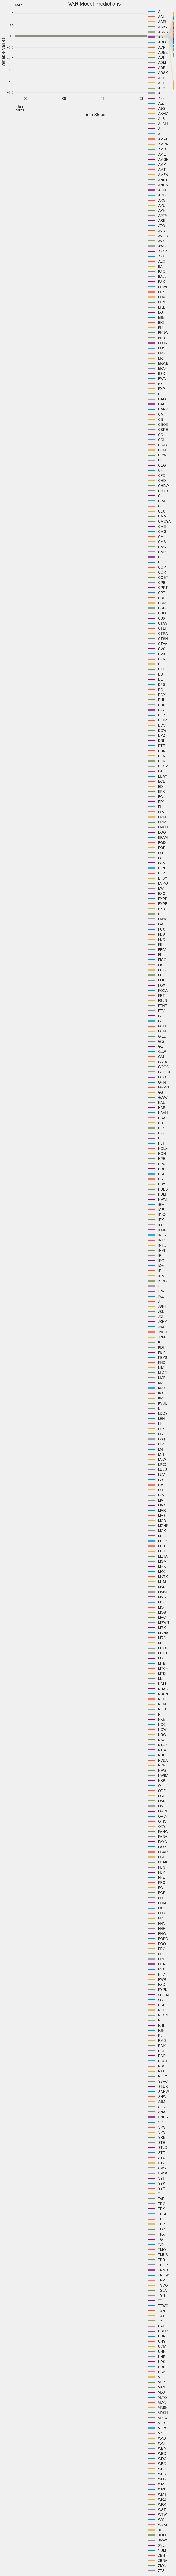

In [31]:
import matplotlib.pyplot as plt

# Assuming predictions_df is your DataFrame with predictions
predictions_df.plot(figsize=(10, 6))
plt.title('VAR Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Variable Values')
plt.legend(loc='upper right')
plt.show()